### Question1:

In [1]:

import numpy as np
import matplotlib.pyplot as plt

X = np.array([[-1, -1], [-2, -2], [-2, -1], [-1, -2], [1, 2], [2, 1], [1, 1], [2, 2]])
x = X[:,0]
Y = np.array([-1,-1,-1,-1,1,1,1,1])
# Presence of One provides a more better graphs, more generalized
X_origin = np.hstack((np.ones((x.size,1)),X))
theta = np.array([0.2, 0.1, 0.6])
X_origin

array([[ 1., -1., -1.],
       [ 1., -2., -2.],
       [ 1., -2., -1.],
       [ 1., -1., -2.],
       [ 1.,  1.,  2.],
       [ 1.,  2.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  2.]])

In [2]:
def probability(theta_in, x_in):
    pred = np.dot(x_in, theta_in)
    return 1 / (1 + np.exp(-pred))

In [3]:
#solving this equation would give the same gradient equation
def cost_function(X1,Y1,thet):
    S=np.multiply(Y1,np.log(np.dot(X1,thet)))
    L=np.multiply((1-Y1),np.log(1-(np.dot(X1,thet))))
    G= -1*(np.sum(S+L)/len(Y1))
    #G=(-1/len(Y1))*(np.sum(Y1*np.log(np.dot(X1,thet))+((1-Y1)*(np.log(1-np.dot(X1,thet))))))
    return G

In [4]:
def gradient_descent(x_train, y_train, theta_i, alpha, iterations):
    n = len(y_train)
    cost_history = [0] * iterations
    for itr in range(iterations):
        y_pred = probability(theta_i, x_train)
        loss=y_pred-y_train
        #Here we take the tranpose so the their result is automatically summed, as they undergo DotProduct. Thus 
        #removing the need for Summation.
        grad = np.dot(np.transpose(x_train),loss)/n
        theta_i = theta_i - alpha*grad
        cost = cost_function(x_train, y_train, theta_i)
        cost_history[itr] = cost
        if(cost>cost_history[itr-1]):
            alpha = alpha*0.1
    return theta_i, cost_history




In [5]:
#For getting the extremes of the original data to be used to
#get the values of the new x and from which we create y. To draw the desicion boundary using our new theta
#which spans the extreme of our datapoints.
def GetExtremes(Data) :
    X_o = Data[:,0]
    Y_o = Data[:,1]
    return (min(X_o),max(X_o),min(Y_o),max(Y_o))

In [6]:
def getLine(DirVect,Data):
    (c,A,B)=DirVect
    (min_x,max_x,min_y,max_y) = GetExtremes(Data)
    x_new = np.arange(min_x, max_x, 0.01)
    #Ax1+Bx2+C=0 assuming x2 as y_new
    y_new = -(A*x_new + c)/B
    return (x_new,y_new)

In [7]:
(theta_new, cost) = gradient_descent(X_origin,Y,theta,0.01,100)
theta_new

<ipython-input-3-d723d954b498>:3: RuntimeWarning: invalid value encountered in log
  S=np.multiply(Y1,np.log(np.dot(X1,thet)))
<ipython-input-3-d723d954b498>:4: RuntimeWarning: invalid value encountered in log
  L=np.multiply((1-Y1),np.log(1-(np.dot(X1,thet))))


array([-0.30183771,  1.00163791,  1.49123869])

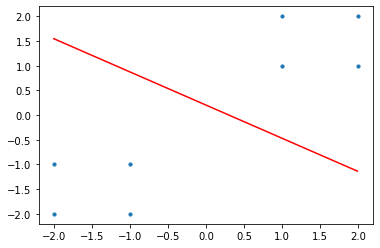

In [8]:
plt.scatter(X[:,0],X[:,1], s=10)
(x_L,y_L) = getLine(theta_new,X)
plt.plot(x_L, y_L, '-',color='r')